# Fundamentals of Data Analysis Tasks

---

**Author: Damien Farrell**

---

## Task One

> The Collatz conjecture is a famous unsolved problem in mathematics. The problem is to prove that if you start with any positive integer $x$ and repeatedly apply the function $f(x)$ below, you always get stuck in the repeating sequence $1, 4, 2, 1, 4, 2, ...$
> $$
> f(n) = 
> \begin{cases} 
> n \div 2 & \text{if } n \text{ is even} \\
> 3n + 1 & \text{if } n \text{ is odd}
> \end{cases}
> $$
> Your task is to verify, using Python, that the conjecture is true for the first 10,000 positive integers.

**Function f(x) to carry out the calculation.**

In [1]:
def f(x):
    if x % 2 == 0:
        return x // 2
    else:
        return (3 * x) + 1

**Fuction collatz(x) to loop through the calculation until $x = 1$.**

In [2]:
def collatz(x, verbose=False):
    while x != 1:
        if verbose:
            print(x, end=', ')
        x = f(x)
    if verbose:
        print(x, end='\n')
        print()
    return x

**Fuction verify(y) to verify the Collatz conjecture on $y$ number of positive integers.**

In [3]:
def verify(y, verbose=False):
    for i in range(1, y + 1):
        result = collatz(i, verbose)
        if result != 1:
            print(f'The Collatz conjecture is false, it failed on integer {i}')
            return

    print(f'The Collatz conjecture is verified to be true on {y:,} number of positive integers')

<p>To show the calculation on each iteration, set verbose = True.<sup id="fnref:1"><a href="#fn:1">1</a></sup></p>

In [4]:
verify(10_000, verbose=False)

The Collatz conjecture is verified to be true on 10,000 number of positive integers


---

## Task Two

> Give an overview of the famous penguins data set, explaining the types of variables it contains. Suggest the types of variables that should be used to model them in Python, explaining your rationale.

In [5]:
import pandas as pd
import numpy as np

url_name = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv'

df = pd.read_csv(url_name)

In [6]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [7]:
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

<p><strong>Determining the unique values for the categorical variables:</strong><sup id="fnref:1"><a href="#fn:1">2</a></sup></p>

In [48]:
numerical_variables = df[["bill_length_mm", "bill_depth_mm","flipper_length_mm","body_mass_g"]]
categorical_variables = df[["species","island","sex"]]

for variable in categorical_variables:
  print(df[variable].unique())

['Adelie' 'Chinstrap' 'Gentoo']
['Torgersen' 'Biscoe' 'Dream']
['MALE' 'FEMALE']


**Explaining the Types of Variables:**

*Species (Categorical Variable):* <br>
This variable represents the species of penguins, and it is categorical nominal scale variable because the species names are categories without a specific order. It is not ordinal. It has three possible categories: Adelie, Chinstrap, and Gentoo. In the dataframe it is an object which contain strings. An dataframe object is a catch-all data type that can represent various types of data. It is a discete statistic distribution.

*Island (Categorical Variable):* <br>
The dataset includes the island where the penguins were observed: Biscoe, Dream, and Torgersen. Like the "Species" variable, this is a categorical nominal scale variable. In the dataframe it is an object which contain strings. It is a discete statistic distribution.

*Bill Length (Numerical Variable):* <br>
This variable represents the length of the penguin's bill. It is a numerical variable which which has a floating-point data type. It has a ratio scale of measurement as is a continuous numerical variable that has a true zero point (0 mm represents the absence of bill length), and it supports all arithmetic operations, including addition, subtraction, multiplication, and division. It is a continuous statistic distribution.

*Bill Depth (Numerical Variable):* <br>
Similar to bill length, this variable represents the depth of the penguin's bill. It is a real numerical variable which has a floating-point data type. It has a ratio scale of measurement. It is a continuous statistic distribution.

*Flipper Length (Numerical Variable):* <br>
This variable represents the length of the penguin's flipper. It is a real numerical variable which has a floating-point data type. It has a ratio scale of measurement. It is a continuous statistic distribution.

*Body Mass (Numerical Variable):* <br>
Body mass represents the weight of the penguins. It is a real numerical variable which which has a floating-point data type. It has a ratio scale of measurement. It is a continuous statistic distribution.

*Sex (Categorical Variable):* <br>
The dataset includes the sex of the penguins. This is categorical nominal scale variable and has three categories: Male, Female, and NaN (missing data). In the dataframe it is an object which contains strings and null values. It is a discete statistic distribution.


**Suggest the types of variables that should be used to model them in Python, explaining your rationale:**

The type of variables to use when modeling the Penguins dataset ???  

What the variables are now and what they should be?!?!


---
## Task Three

> For each of the variables in the penguins data set, suggest what probability distribution from the numpy random distributions list is the most appropriate to model the variable.


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df[df.isna().any(axis=1)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


In [49]:
df.dropna(inplace=True)

**Investigating each variable to determine the best fit:**

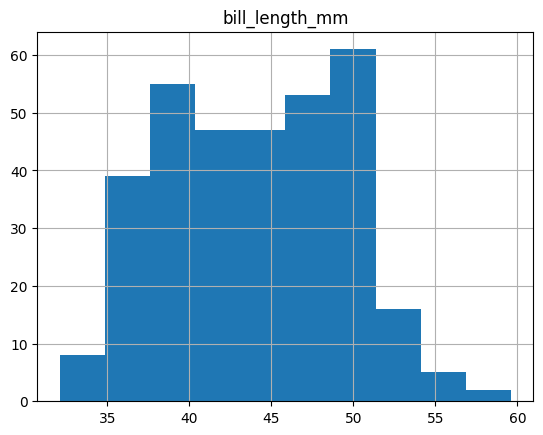

In [47]:
df.hist(numerical_variables.columns[0]);

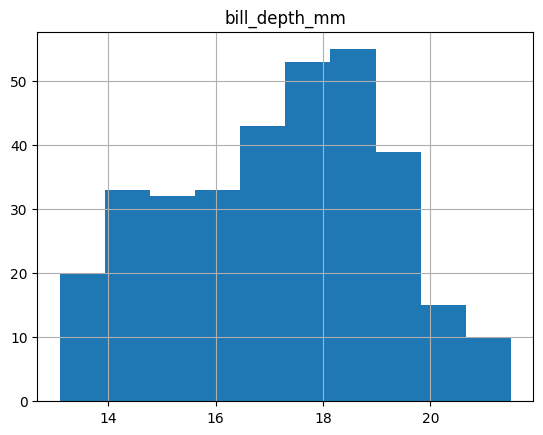

In [50]:
df.hist(numerical_variables.columns[1]);

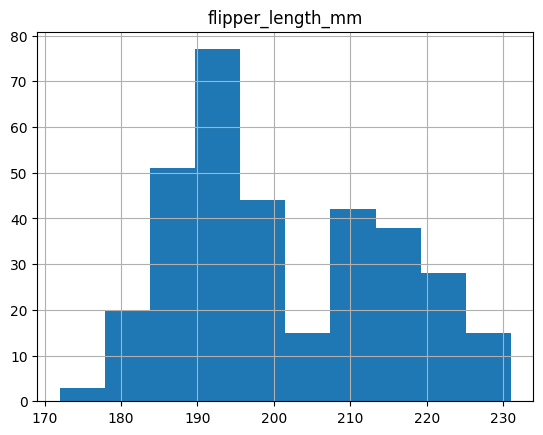

In [51]:
df.hist(numerical_variables.columns[2]);

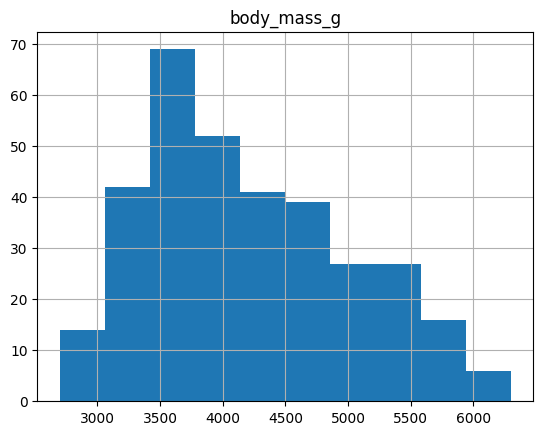

In [52]:
df.hist(numerical_variables.columns[3]);

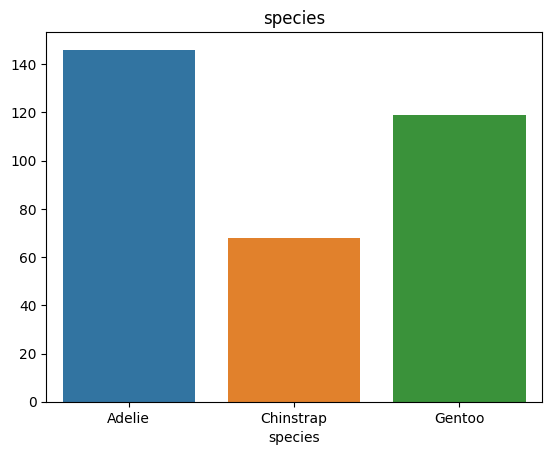

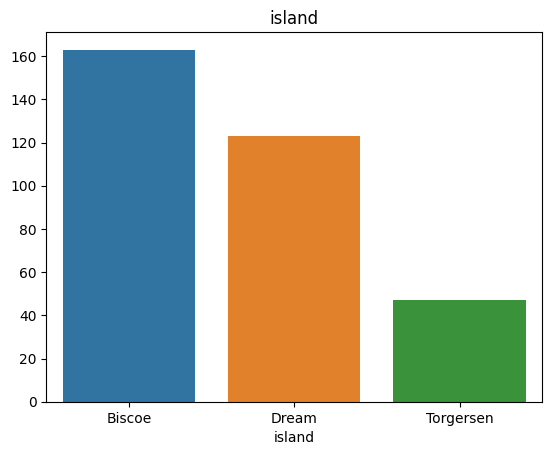

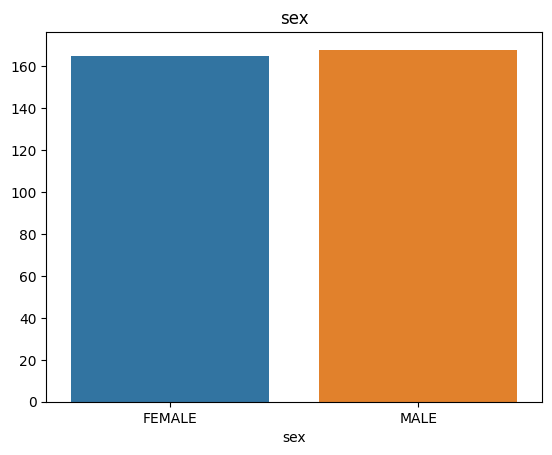

In [12]:
for variable in categorical_variables:
    c = df.groupby(variable)[variable].count()
    sns.barplot(x=c.index,y=c.values)
    plt.title(variable)
    plt.show()

sex == Bernoulli distribution

chi == body mass?

https://www.spcforexcel.com/knowledge/basic-statistics/deciding-which-distribution-fits-your-data-best/


https://statisticsbyjim.com/hypothesis-testing/identify-distribution-data/
https://statisticsbyjim.com/basics/goodness-of-fit/

https://docs.scipy.org/doc/scipy/reference/stats.html

Note that this example covers continuous data. For categorical and discrete variables, you should use the chi-square goodness of fit test.

https://statisticsbyjim.com/hypothesis-testing/chi-square-goodness-of-fit-test/


**Creating a best_fit(variable) function to automatically identify the best-fitting distribution among multiple candidates using the Akaike Information Criterion (AIC)**

In [13]:
from scipy import stats

In [38]:
def best_fit(variable):
    
    # List of candidate distributions
    distributions = [
        "beta", "gamma", "expon", "norm", "lognorm", "triang", "uniform", "weibull_min", "wrapcauchy", "alpha"
    ]
    
    best_fit_name = None
    best_aic = np.inf
    
    for distribution_name in distributions:
        distribution = getattr(stats, distribution_name)
        params = distribution.fit(variable)
        
        # Fit the distribution to the data and calculate the AIC
        aic = -2 * distribution.logpdf(data, *params).sum() + 2 * len(params)
        
        # Check if this distribution has a lower AIC
        if aic < best_aic:
            best_aic = aic
            best_fit_name = distribution_name
    
    return print(f"Best-fit distribution: {best_fit_name} with AIC: {best_aic}")

In [39]:
data = df["bill_length_mm"]


best_fit(data)

Best-fit distribution: beta with AIC: 2063.890613381589


# References
---

<ol>
  <li>
    <a href="https://stackoverflow.com/questions/5980042/how-to-implement-the-verbose-or-v-option-into-a-script" id="fn:1">How to implement the --verbose or -v option into a script?</a>
  </li><br>

  <li>
    <a href="https://www.statology.org/pandas-unique-values-in-column/" id="fn:2">Pandas: How to Find Unique Values in a Column</a>
  </li><br>

  <li>
    <a href="https://prvnk10.medium.com/distribution-of-a-categorical-variable-a0628b605e3d" id="fn:3">Distribution of a categorical variable</a>
  </li><br>

  <li>
    <a href="URL_OF_YOUR_FOURTH_LINK" id="fn:4">Fourth Link Text</a>
  </li><br>

  <li>
    <a href="URL_OF_YOUR_FIFTH_LINK" id="fn:5">Fifth Link Text</a>
  </li><br>

  <li>
    <a href="URL_OF_YOUR_SIXTH_LINK" id="fn:6">Sixth Link Text</a>
  </li><br>

  <li>
    <a href="URL_OF_YOUR_SEVENTH_LINK" id="fn:7">Seventh Link Text</a>
  </li><br>

  <li>
    <a href="URL_OF_YOUR_EIGHTH_LINK" id="fn:8">Eighth Link Text</a>
  </li><br>

  <li>
    <a href="URL_OF_YOUR_NINTH_LINK" id="fn:9">Ninth Link Text</a>
  </li><br>

  <li>
    <a href="URL_OF_YOUR_TENTH_LINK" id="fn:10">Tenth Link Text</a>
  </li>
</ol>


***
# End